<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/Machine_learning_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optics

Silhouette Score: 0.6326981917681005


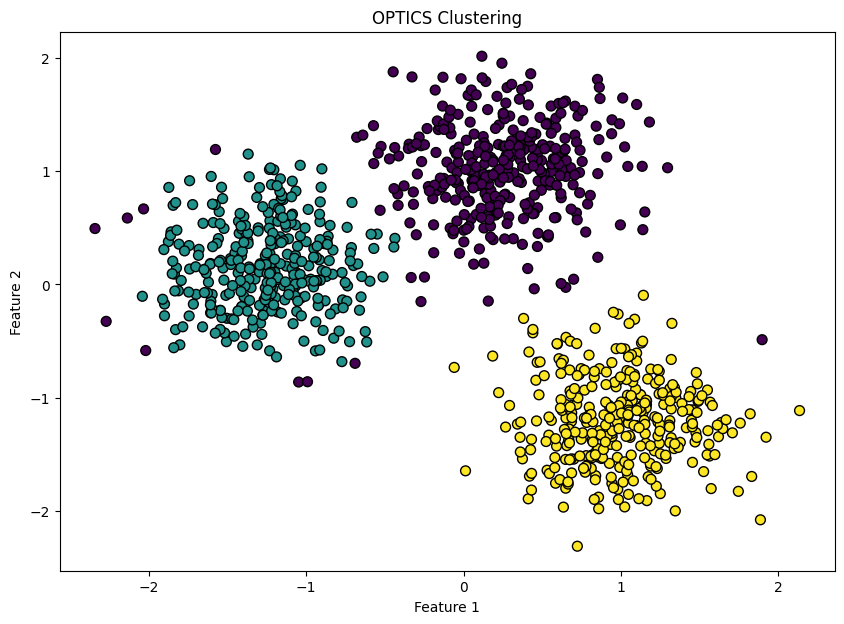

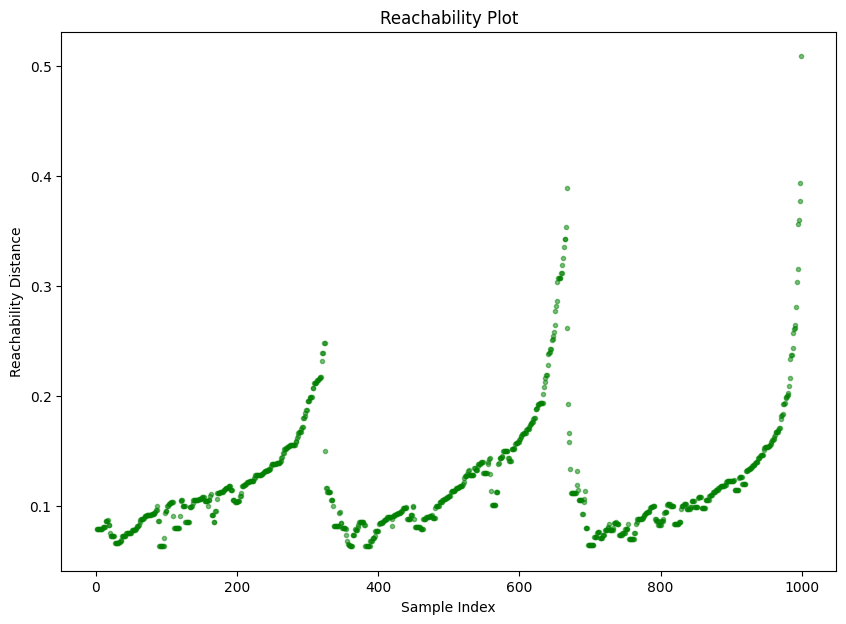

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1)

model.fit(X_scaled)
y_optics = model.labels_

silhouette_avg = silhouette_score(X_scaled, y_optics)
print(f'Silhouette Score: {silhouette_avg}')

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_optics, s=50, cmap='viridis', edgecolor='k')
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

space = np.arange(len(X_scaled))
reachability = model.reachability_[model.ordering_]

plt.figure(figsize=(10, 7))
plt.plot(space, reachability, 'g.', alpha=0.5)
plt.title('Reachability Plot')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.show()


spectral clustering




Silhouette Score: 0.6520143112488118


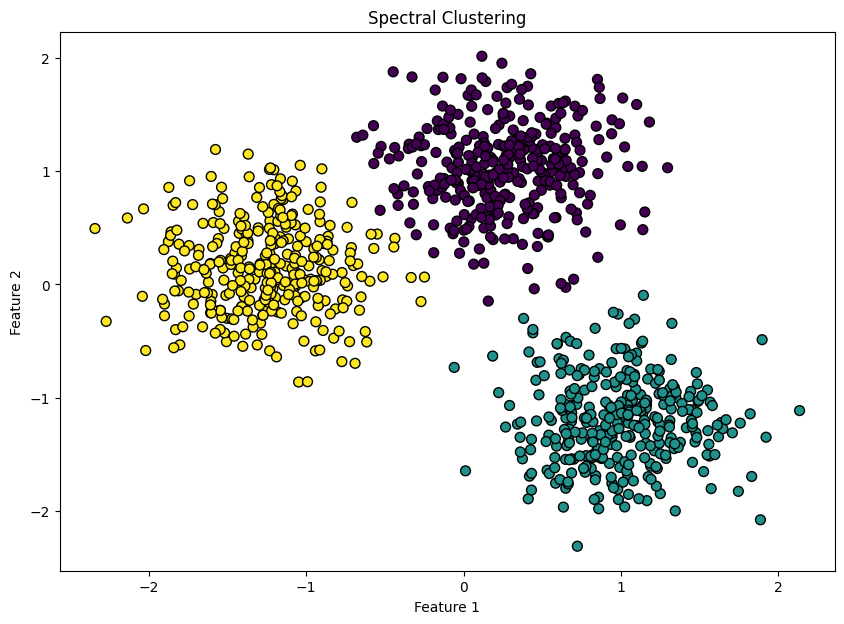

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42, n_neighbors=10)

y_spectral = model.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, y_spectral)
print(f'Silhouette Score: {silhouette_avg}')

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_spectral, s=50, cmap='viridis', edgecolor='k')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Anomaly detection

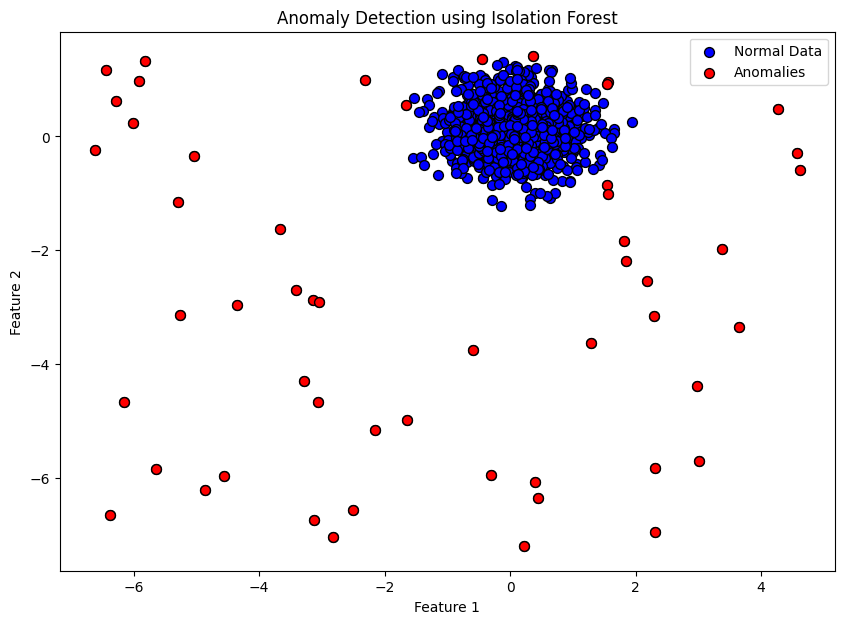

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=1000, centers=1, cluster_std=0.60, random_state=0)

np.random.seed(42)
X = np.vstack([X, np.random.uniform(low=-6, high=6, size=(50, 2))])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = IsolationForest(contamination=0.05, random_state=42)

model.fit(X_scaled)

y_pred = model.predict(X_scaled)
anomalies = X_scaled[y_pred == -1]

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', s=50, edgecolor='k', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=50, edgecolor='k', label='Anomalies')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
